In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [5]:
X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]

In [10]:

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
print(W)
print(b)

learning_rate = 0.01  # 学习率
# 线性回归函数
def linear_regression(x):
    return W*x + b

# 损失函数
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

# 优化器采用随机梯度下降(SGD)
optimizer = tf.optimizers.SGD(learning_rate)

<tf.Variable 'weight:0' shape=() dtype=float32, numpy=0.6265369>
<tf.Variable 'bias:0' shape=() dtype=float32, numpy=-0.7356707>


In [7]:
training_steps = 1000  # 训练次数
display_step = 50  # 训练50次输出一次

# 计算梯度，更新参数
def run_optimization():
    # tf.GradientTape()梯度带，可以查看每一次epoch的参数值
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
    # 计算梯度
    gradients = g.gradient(loss, [W, b])
    # 更新W，b
    optimizer.apply_gradients(zip(gradients, [W, b]))

# 开始训练
for step in range(1, training_steps+1):
    run_optimization()
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.157835, W: 0.412896, b: -0.344466
step: 100, loss: 0.148581, W: 0.403394, b: -0.277104
step: 150, loss: 0.140386, W: 0.394452, b: -0.213710
step: 200, loss: 0.133129, W: 0.386037, b: -0.154052
step: 250, loss: 0.126701, W: 0.378118, b: -0.097909
step: 300, loss: 0.121009, W: 0.370666, b: -0.045074
step: 350, loss: 0.115967, W: 0.363652, b: 0.004648
step: 400, loss: 0.111502, W: 0.357052, b: 0.051441
step: 450, loss: 0.107548, W: 0.350841, b: 0.095476
step: 500, loss: 0.104046, W: 0.344996, b: 0.136917
step: 550, loss: 0.100945, W: 0.339495, b: 0.175916
step: 600, loss: 0.098198, W: 0.334318, b: 0.212617
step: 650, loss: 0.095766, W: 0.329446, b: 0.247155
step: 700, loss: 0.093611, W: 0.324861, b: 0.279659
step: 750, loss: 0.091703, W: 0.320547, b: 0.310248
step: 800, loss: 0.090013, W: 0.316486, b: 0.339034
step: 850, loss: 0.088517, W: 0.312665, b: 0.366124
step: 900, loss: 0.087192, W: 0.309069, b: 0.391618
step: 950, loss: 0.086018, W: 0.305685, b: 0.415609
step: 1

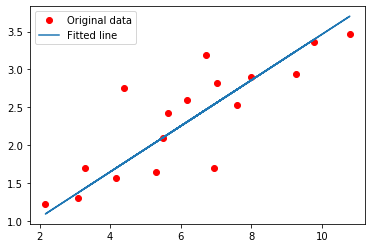

In [9]:
import matplotlib.pyplot as plt

plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, numpy.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()